In [2]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"

In [3]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset


In [20]:
import utils.figure as ufigure
# %load_ext autoreload
%autoreload 1
%aimport utils.figure

In [4]:
Data = Dataset(PROJECT_PATH, 'final')
Data.load_data()

Loading INFO.yaml ...
Finished loading INFO
Loading config.yaml ...


  4%|▎         | 5/141 [00:00<00:03, 38.10it/s]

Finished loading config


100%|██████████| 141/141 [00:07<00:00, 18.85it/s]


In [5]:
# configuration
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

<hr><hr>

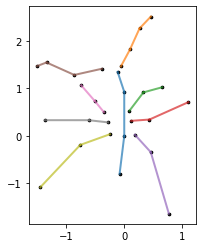

In [32]:
frame = 100
ufigure.ant_model(rot_bp, skeleton, skeleton_color, fr=100)